# Analysis for ads

### 1. Background

Facebook has become one of the major players in the online advertising space, when Facebook users interact with the platform, like specific pages or comment on specific posts, Facebook builds the user's profile based on their identity and interests. So, advertisers can create a Facebook ad and then create an "audience" for that ad, they can be established through a series of attributes, including gender, age, location and interests, which means that advertisers can adjust content appropriately for specific audiences and improve their sales.
From a business perspective, we want to improve business performmance by using dataset to maximize the number of impressions and effective these ads in generating clicks and revenue. So this project is going to analysis a dataset which display of data from advertisement placement to final payment, and optimize the advertising strategy by analysing the advertising result.

### 2. Dataset Description

We will be using the dataset below for analysing ads. Link to the dataset is : https://www.kaggle.com/loveall/clicks-conversion-tracking

The dataset obtained each column as follows:
ad_id: a unique ID for each ad.

xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

fb_campaign_id: an ID associated with how Facebook tracks each campaign.

age: age of the person to whom the ad is shown.

gender: gender of the person to whom the add is shown.

interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

Impressions: the number of times the ad was shown.

Clicks: number of clicks on for that ad.

Spent: Amount paid by company xyz to Facebook, to show that ad.

Total conversion: Total number of people who enquired about the product after seeing the ad.

Approved conversion: Total number of people who bought the product after seeing the ad.

First, we will describe user's profile by analysis column "age", "gender", “interest”.  Finally, we will using linear regression to predict the most valuable target audience and give suggestions for optimization.

### 3. Data Cleaning

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"/Users/liwensun/opt/anaconda3/KAG_conversion_data.csv")

In [3]:
df.isnull().count()

ad_id                  1143
xyz_campaign_id        1143
fb_campaign_id         1143
age                    1143
gender                 1143
interest               1143
Impressions            1143
Clicks                 1143
Spent                  1143
Total_Conversion       1143
Approved_Conversion    1143
dtype: int64

#### The dataset does not contain null values.

In [4]:
df.drop_duplicates().count()

ad_id                  1143
xyz_campaign_id        1143
fb_campaign_id         1143
age                    1143
gender                 1143
interest               1143
Impressions            1143
Clicks                 1143
Spent                  1143
Total_Conversion       1143
Approved_Conversion    1143
dtype: int64

#### The dataset does not contain duplicate values.

In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### 4. Data Analysis

### 4.1 Overall Statistics

In [6]:
# Total number of ad displays

df['Impressions'].sum()

213434828

In [7]:
# Total number of ad clicks

df['Clicks'].sum()

38165

In [8]:
# Total number of inquiries after customers viewed the ads

df['Total_Conversion'].sum()

3264

In [9]:
# Total number of times customers pay after viewing ads

df['Approved_Conversion'].sum()

1079

In [10]:
# Customer acquisition cost

df['Spent'].sum()

58705.229958205004

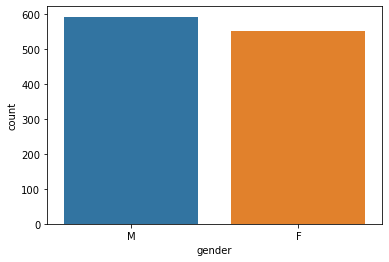

In [12]:
# Gender ratio

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='gender', data=df)
plt.show()

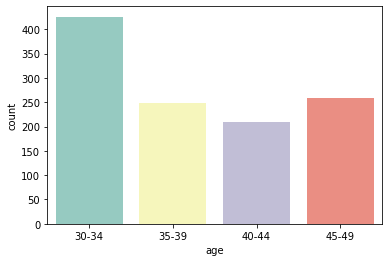

In [13]:
# Number of people in each age group

sns.countplot(x='age', data=df, palette='Set3')
plt.show()

#### It can be seen that the number of people in the 30-34 age group takes the largest place, followed by the 45-49 age group.

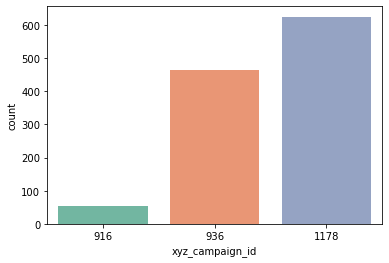

In [14]:
# Percentage of ads by xyz

sns.countplot(x='xyz_campaign_id', data=df, palette='Set2')
plt.show()

#### The largest number of ads in xyz is for series number 1178 and the smallest number is for series number 916.

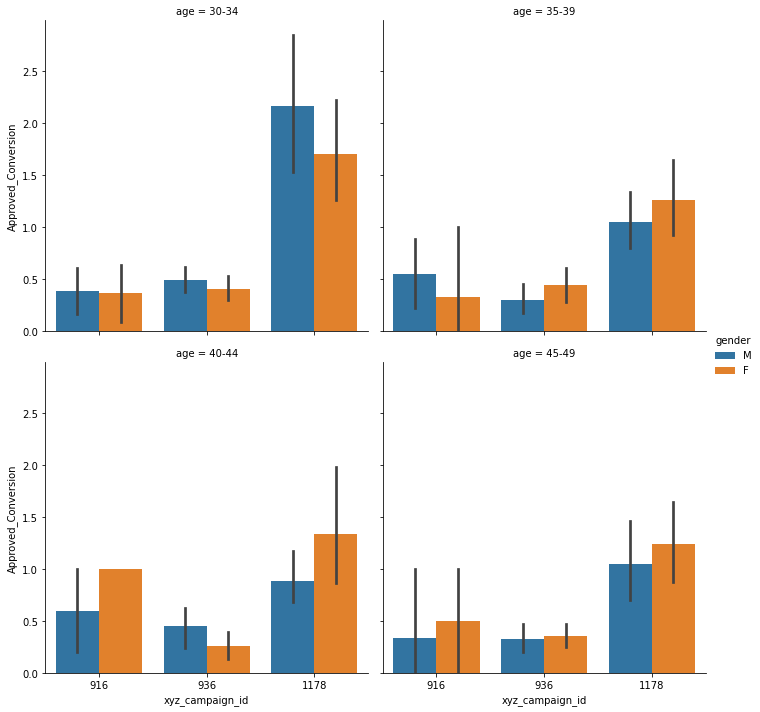

In [15]:
# Gender and age group of advertisements and paying customers of xyz company:

sns.catplot(x='xyz_campaign_id', y='Approved_Conversion', hue='gender', col='age', kind='bar', data=df, col_wrap=2)

#### As can be seen from the graph, the number of paying customers for ads in the 1178 category is the highest among all age groups, both male and female, analyzed by gender.

#### Among 35-39-year-olds, 40-44-year-olds, and 45-49-year-olds, more women than men spent money on 1178 ads.

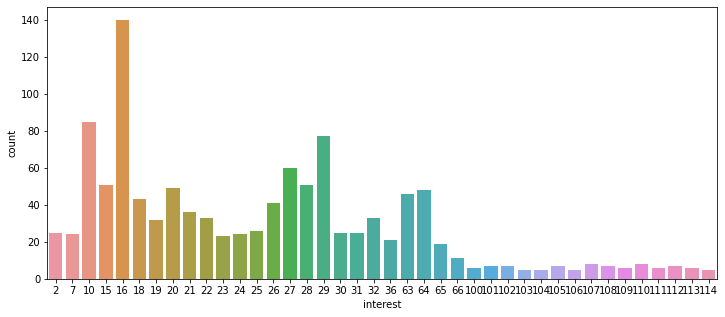

In [17]:
# Total categories of interest:

fig_dims=(12,5)
fig,ax=plt.subplots(figsize=fig_dims)
sns.countplot(x='interest',data=df)
plt.show()

####  Statistics show that the top five interest numbers are 16, 10, 29, 27 and 28.

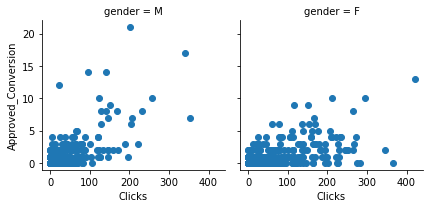

In [18]:
# Relationship between click and Approved Conversion

g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter, 'Clicks','Approved_Conversion')
g.add_legend()

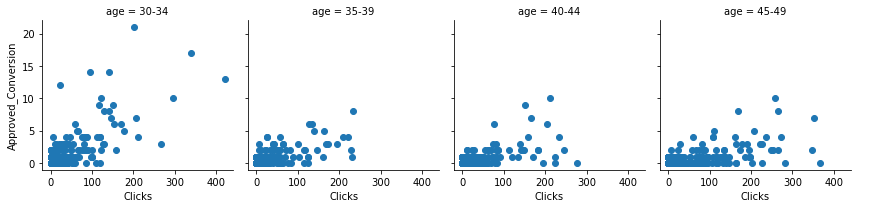

In [19]:
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Clicks','Approved_Conversion')
g.add_legend()

#### From the graph, it can be senn that men have a higher click-through rate than women, but women pay more after clicking on ads. Moreover, people aged 30-34 have a higher tendency to pay after clicking ads.

# Relationship between Approved Conversion and Total Conversion

g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter, 'Total_Conversion','Approved_Conversion')
g.add_legend()

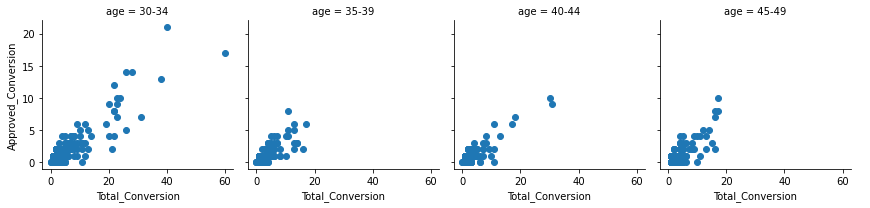

In [21]:
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter, 'Total_Conversion','Approved_Conversion')
g.add_legend()

#### From the graph, it can be seen that women buys more products than men after enquiring the product. However men tends to enquire more about the product. Also, people in age group 30-34 are more likely to buy the product after enquiring the product.

### 5. Result

* The overall conversion rate was 0.017% for clicks, 8.6% for inquiries, 33% for paid conversions, and 58,705 (USD) for customer acquisition costs. The cost of customer acquisition is 58,705(US).

* The number of ads of 1178 type is the highest as long as the higher paid, and the ads of this type are more popular among men aged 30-34, so the ads can be focused on this age group.

* The number of advertisements displays and clicks, and the number of inquiries and payments.

* campaign_c has the largest number of ads, and has the largest number of people who bought the product after seeing the ad.

* The data shows that men tend to click more than women, but women will buy more products than men after clicking the ads, and, women buys more products than men after enquiring the product.

### 6. Suggestion

There is a high linear correlation between display and inquiry. Generally speaking, users have to see the ads, then click on them, and then pay after consulting, so the correlation between clicks and consulting should be higher than that between clicks and display. Therefore, it is effective to optimize the ad display to increase the proportion of users from display to inquiry to payment.